In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, timedelta
def partionnage(chemin):
    row=[]
    with open(chemin, 'r') as file:
        i=0
        reader = csv.reader(file, delimiter=';')
        new_row={}
        for row in reader:
            if(i!=0):
                temp_dic={}
                temp_dic["date"]=(row[0].split(","))[1].split(" ")[0]
                temp_dic["heure"]=int((row[0].split(","))[1].split(" ")[1].split(":")[0])
                temp_dic["OT"]=float((row[0].split(","))[2])
                new_row[int((row[0].split(","))[0])]=temp_dic
            i=i+1
        return new_row
    

data=partionnage('ETTh1_without_missing.csv')
dataFinale=partionnage('ETTh1_without_missing.csv')

data={cle: valeur for i, (cle, valeur) in enumerate(data.items()) if i > 16559 } #1 an
print(data)
# Récupérer la dernière valeur
last_entry = data[max(data.keys())]

# Convertir la date et l'heure en objets datetime
last_date = datetime.strptime(last_entry['date'], "%Y-%m-%d")
last_hour = last_entry['heure']
dataFinaleValue=[]
# Incrémenter la dernière date et l'heure 100 fois
for _ in range(100):
    next_date = last_date + timedelta(hours=last_hour)
    # Formater la date dans le même format que celui d'origine
    next_date_formatted = next_date.strftime("%Y-%m-%d %H:%M:%S")
    print(next_date_formatted)
    dataFinaleValue.append(next_date_formatted)
    # Incrémenter d'une heure
    last_hour += 1



{16560: {'date': '2018-05-22', 'heure': 0, 'OT': 6.964000225067139}, 16561: {'date': '2018-05-22', 'heure': 1, 'OT': 7.315999984741211}, 16562: {'date': '2018-05-22', 'heure': 2, 'OT': 7.456999778747559}, 16563: {'date': '2018-05-22', 'heure': 3, 'OT': 7.879000186920166}, 16564: {'date': '2018-05-22', 'heure': 4, 'OT': 8.300999641418457}, 16565: {'date': '2018-05-22', 'heure': 5, 'OT': 9.003999710083008}, 16566: {'date': '2018-05-22', 'heure': 6, 'OT': 9.145000457763672}, 16567: {'date': '2018-05-22', 'heure': 7, 'OT': 7.456999778747559}, 16568: {'date': '2018-05-22', 'heure': 8, 'OT': 6.823999881744385}, 16569: {'date': '2018-05-22', 'heure': 9, 'OT': 6.683000087738037}, 16570: {'date': '2018-05-22', 'heure': 10, 'OT': 6.401999950408936}, 16571: {'date': '2018-05-22', 'heure': 11, 'OT': 3.7279999256134033}, 16572: {'date': '2018-05-22', 'heure': 12, 'OT': 4.150000095367432}, 16573: {'date': '2018-05-22', 'heure': 13, 'OT': 6.541999816894531}, 16574: {'date': '2018-05-22', 'heure': 14,

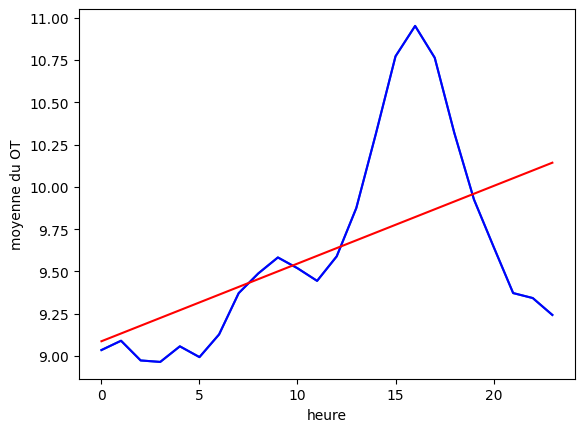

In [4]:
def meanByHour(data):
    numberOfHours=[0 for i in range(0,24)]
    OTmean=[0 for i in range(0,24)]
    i=0
    for i,k in data.items():
        numberOfHours[k["heure"]]=numberOfHours[k["heure"]]+1
        OTmean[k["heure"]]=OTmean[k["heure"]]+k["OT"]    
    return [j / i for j, i in zip(OTmean, numberOfHours)]
def regressionHeure(data,number):
    regression_model = LinearRegression()
    regression_model.fit(np.array([i for i in range(0,24)]).reshape(-1, 1), meanByHour(data))
    y_predicted = regression_model.predict(np.array([[0]]))
    return regression_model.predict(np.array([[number]]))
def graph(data):
    plt.plot([i for i in range(0,24)],meanByHour(data))
    plt.plot([i for i in range(0,24)],meanByHour(data),color='b', label='Courbe 2')
    plt.plot([i for i in range(0,24)],[regressionHeure(data,i) for i in range(24)],color='r', label='Regression lineaire')
    plt.xlabel('heure')
    plt.ylabel('moyenne du OT')
    plt.show()

graph(data)


[6.967249979575475, 9.112875064214071, 9.318041602770487, 8.253958344459534, 8.558791637420654, 10.000916679700216, 10.648874918619791, 11.05620833237966, 10.710333347320557, 10.41100025177002, 10.006875077883402, 9.593541661898294, 10.414249897003174, 10.402541677157084, 9.907249967257181, 10.36733333269755, 11.105958342552185, 9.804583311080933, 6.897000044584274, 8.309791763623556, 9.564291616280874, 11.106041669845581, 11.639500061670939, 11.475416700045267, 10.678083221117655, 9.171333312988281, 9.461750070254007, 10.343833406766256, 7.908124963442485, 8.098666687806448, 8.831500053405762, 6.357687532901764]


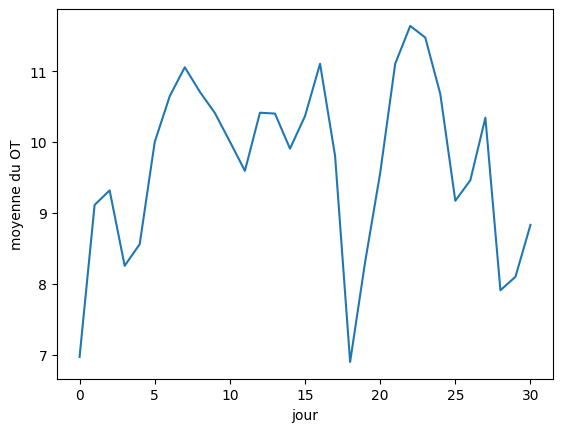

In [5]:
def meanByDay(data):
    OTmean=[0 for i in range(int((len(data)-11)/24)+1)]
    numberOfDay=0
    hour=0
    for i,k in data.items():
        OTmean[numberOfDay]=OTmean[numberOfDay]+k["OT"]
        hour=hour+1
        if(hour==24):
            hour=0
            OTmean[numberOfDay]=OTmean[numberOfDay]/24
            numberOfDay=numberOfDay+1
    OTmean[len(OTmean)-1]=OTmean[len(OTmean)-1]/16
    return OTmean


def graphOTbyDay(data):
    AllDay=[i for i in range(len(meanByDay(data))-1)]
    print(meanByDay(data))
    plt.plot(AllDay,meanByDay(data)[0:len(meanByDay(data))-1])
    plt.xlabel('jour')
    plt.ylabel('moyenne du OT')
    plt.show()

graphOTbyDay(data)

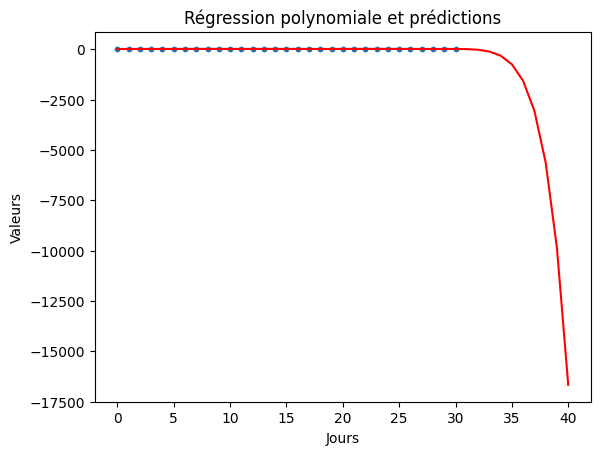

(LinearRegression(),
 array([[ 1.32801795e+00],
        [-2.94109248e+01],
        [-1.16574444e+02],
        [-3.21491574e+02],
        [-7.49884779e+02],
        [-1.57446953e+03],
        [-3.06578148e+03],
        [-5.63334802e+03],
        [-9.87968891e+03],
        [-1.66700379e+04]]))

In [56]:
from sklearn.preprocessing import PolynomialFeatures
def RegressionPolynomiale(data):
    x = np.array([i for i in range(31)]).reshape(-1, 1)
    y = np.array(meanByDay(data)[0:31]).reshape(-1, 1)

    # Initialiser une liste pour stocker les coefficients du modèle
    coefficients_list = []

    rmse = 100000
    perfect_degree = 1000000
    
    for i in range(0, 100): 
        
        polynomial_features = PolynomialFeatures(degree=i)
        x_poly = polynomial_features.fit_transform(x)
        model = LinearRegression()
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)
        Newrmse = np.sqrt(mean_squared_error(y, y_poly_pred))
        
        if Newrmse < rmse:
            rmse = Newrmse
            perfect_degree = i

        # Stocker les coefficients du modèle pour chaque ajustement
        coefficients_list.append(model.coef_)
    
    # Affichage de l'évolution des coefficients au fil du temps
    plt.figure(figsize=(10, 6))
    for i in range(perfect_degree + 1):
        plt.plot(range(31), [coefficients[i][0] for coefficients in coefficients_list], label='Coeff ' + str(i))

    plt.xlabel('Jours')
    plt.ylabel('Coefficients')
    plt.title('Évolution des coefficients du modèle polynomiale')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Renvoyer le degré optimal et les coefficients du modèle
    return perfect_degree, coefficients_list

RegressionPolynomiale(data)
